# Introduction

This notebook delves into the temporal aspect of communications between two prominent entities: the White House and the European Commission. Leveraging pre-processed data, this analysis aims to unravel the chronological dynamics of communication strategies employed by these entities over the specified time period. With a keen focus on mentions of Ukraine, the notebook examines the timeline of documents released by both the White House and the European Commission. 

Furthermore, the notebook delves deeper into the share of documents mentioning Ukraine out of the total corpus of communications, providing insights into the relative prioritization of Ukraine-related topics within the broader communication agendas of the White House and the European Commission.

# Set Up the Environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils import group_data

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
# The European Commision data
ec_data = pd.read_csv('data/theeuropeancommission_preprocessed.csv')
ec_data.head()

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine
0,European Commission authorises second safe and...,2021-01-06,Press Release,"Today, the European Commission has granted a c...",today european commission grant conditional ma...,european commission authorise second safe effe...,0
1,Statement by President von der Leyen on the re...,2021-01-07,Statement,What happened in Washington yesterday is as ...,happen washington yesterday appalling outrageo...,statement president von der leyen recent devel...,0
2,Commission proposes to purchase up to 300 mill...,2021-01-08,Press Release,The European Commission today proposed to the ...,european commission today propose EU member st...,commission propose purchase 300 million additi...,0
3,Speech by President von der Leyen at the One P...,2021-01-11,Speech,"Merci Monsieur le Président.\nCher Emmanuel,\n...",merci monsieur le président cher emmanuel deli...,speech president von der leyen one planet summit,0
4,Coronavirus: Commission concludes exploratory ...,2021-01-12,Press Release,"Today, the European Commission concluded explo...",today european commission conclude exploratory...,coronavirus commission conclude exploratory ta...,0


In [4]:
# The White House data
wh_data = pd.read_csv('data/thewhitehouse_preprocessed.csv')
wh_data.head()

,Title,Date,Category,Text,text_preproc,titles_preproc,Ukraine
0,"Press Briefing by Press Secretary Jen Psaki, J...",2021-01-20,Press Release,James S. Brady Press Briefing Room\n\n7:06 P.M...,706 PM est good evening everyone thank join hi...,press briefing press secretary jen psaki janua...,0
1,Fact Sheet: President Biden Sends Immigration ...,2021-01-20,Statement,The U.S. Citizenship Act of 2021 establishes a...,US citizenship act 2021 establish new system r...,fact sheet president biden sends immigration b...,0
2,President Joe Biden Announces Acting Federal A...,2021-01-20,Statement,"WASHINGTON – Today, President Joe Biden announ...",WASHINGTON today president joe biden announce ...,president joe biden announces acting federal a...,0
3,"Press Briefing by Press Secretary Jen Psaki, J...",2021-01-21,Press Release,James S. Brady Press Briefing Room\n\n4:03 P.M...,403 PM est good afternoon thank join today man...,press briefing press secretary jen psaki janua...,0
4,Fact Sheet: President Biden’s New Executive Ac...,2021-01-22,Statement,The COVID-19 pandemic has forced the United St...,covid19 pandemic force united states economy e...,fact sheet president biden new executive actio...,0


# Time-line of the Coverage

In [5]:
# Convert 'Date' column to datetime format
ec_data['Date'] = pd.to_datetime(ec_data['Date'])
wh_data['Date'] = pd.to_datetime(wh_data['Date'])

## Total Count by Month

In [6]:
# Count by month for the EC and the WH
count_by_month_ec = group_data(ec_data, period='M')
count_by_month_ec['Date'] = count_by_month_ec['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

count_by_month_wh = group_data(wh_data, period='M')
count_by_month_wh['Date'] = count_by_month_wh['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

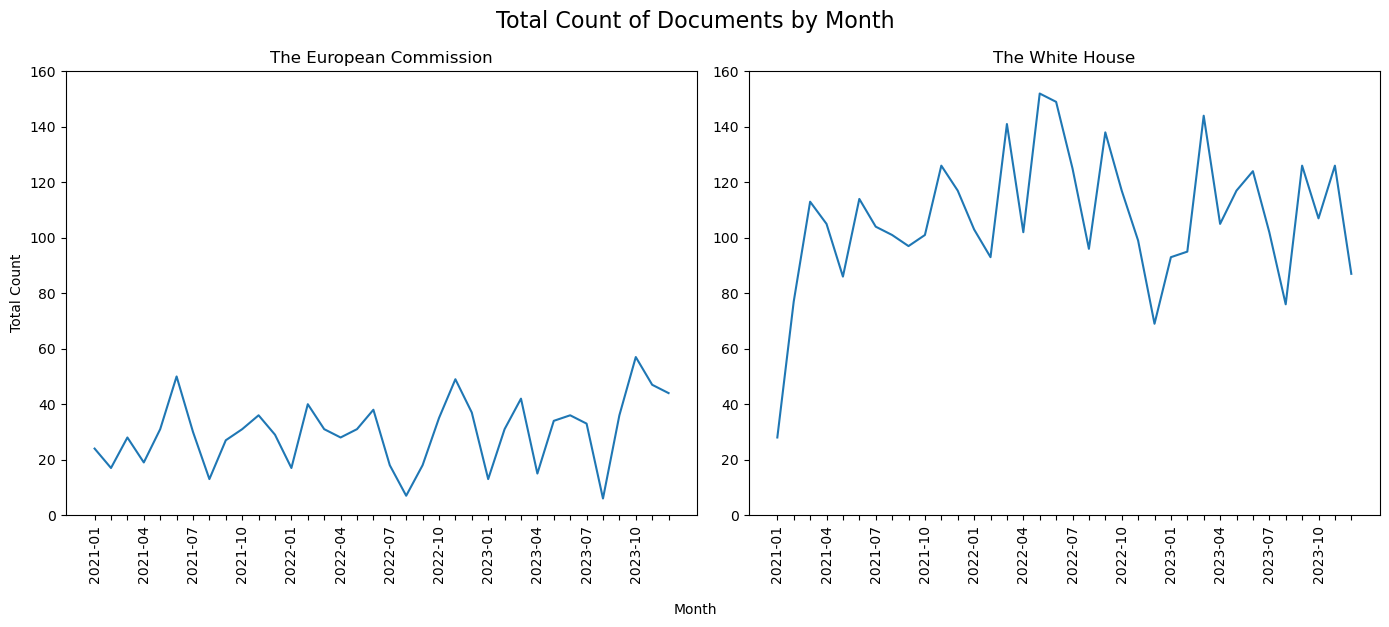

In [7]:
# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for European Commission
axs[0].plot(count_by_month_ec['Date'], count_by_month_ec['Total Count'])
axs[0].set_title('The European Commission')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 160)

# Plot for White House
axs[1].plot(count_by_month_wh['Date'], count_by_month_wh['Total Count'])
axs[1].set_title('The White House')

axs[1].set_ylim(0, 160)

# Rotate x-axis labels to avoid overlapping
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')

# Add a common title
plt.suptitle('Total Count of Documents by Month', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

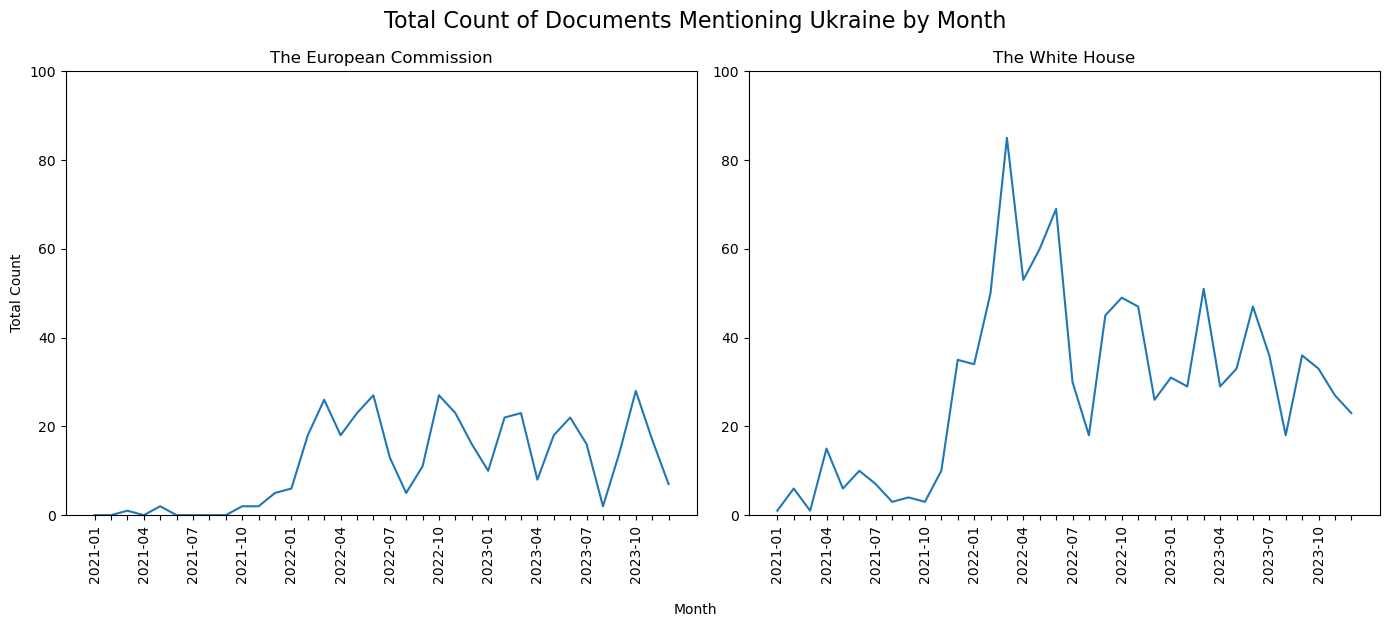

In [8]:
# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for European Commission
axs[0].plot(count_by_month_ec['Date'], count_by_month_ec['Mentions Count'])
axs[0].set_title('The European Commission')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 100)

# Plot for White House
axs[1].plot(count_by_month_wh['Date'], count_by_month_wh['Mentions Count'])
axs[1].set_title('The White House')

axs[1].set_ylim(0, 100)

# Rotate x-axis labels to avoid overlapping
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')

# Add a common title
plt.suptitle('Total Count of Documents Mentioning Ukraine by Month', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Count of documents by Category

In [9]:
# Count by month and document type for the EC and the WH

# The EC
ec_speech = ec_data[ec_data.Category == 'Speech']
counts_by_month_ec_speech = group_data(ec_speech, period='M')
counts_by_month_ec_speech['Date'] = counts_by_month_ec_speech['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

ec_statement = ec_data[ec_data.Category == 'Statement']
counts_by_month_ec_statement = group_data(ec_statement, period='M')
counts_by_month_ec_statement['Date'] = counts_by_month_ec_statement['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

ec_pr = ec_data[ec_data.Category == 'Press Release']
counts_by_month_ec_pr = group_data(ec_pr, period='M')
counts_by_month_ec_pr['Date'] = counts_by_month_ec_pr['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

# The WH
wh_speech = wh_data[wh_data.Category == 'Speech']
counts_by_month_wh_speech = group_data(wh_speech, period='M')
counts_by_month_wh_speech['Date'] = counts_by_month_wh_speech['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

wh_statement = wh_data[wh_data.Category == 'Statement']
counts_by_month_wh_statement = group_data(wh_statement, period='M')
counts_by_month_wh_statement['Date'] = counts_by_month_wh_statement['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

wh_pr = wh_data[wh_data.Category == 'Press Release']
counts_by_month_wh_pr = group_data(wh_pr, period='M')
counts_by_month_wh_pr['Date'] = counts_by_month_wh_pr['Date'].dt.to_timestamp().dt.strftime('%Y-%m')

Mean number of speeches by month: 8
Mean number of statements by month: 12
Mean number of press releases by month: 11


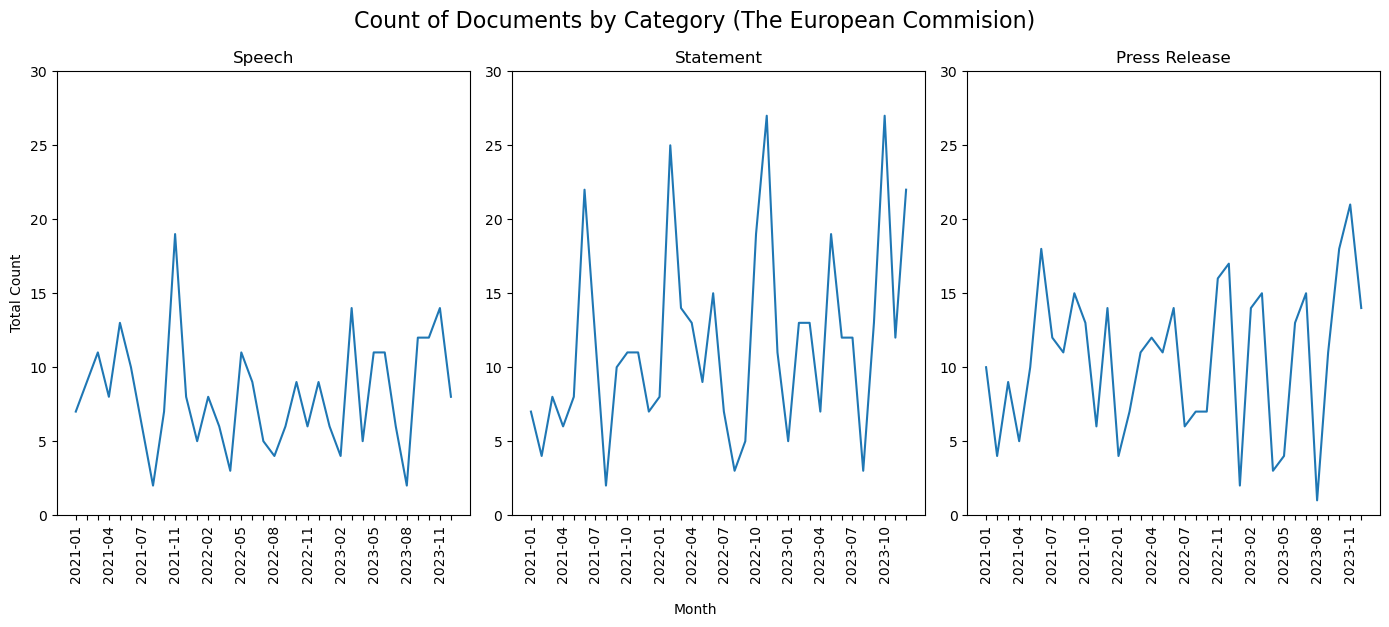

In [10]:
# Print average values
print(f"Mean number of speeches by month: {round(counts_by_month_ec_speech['Total Count'].mean())}")
print(f"Mean number of statements by month: {round(counts_by_month_ec_statement['Total Count'].mean())}")
print(f"Mean number of press releases by month: {round(counts_by_month_ec_pr['Total Count'].mean())}")

# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(counts_by_month_ec_speech['Date'], counts_by_month_ec_speech['Total Count'])
axs[0].set_title('Speech')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 30)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(counts_by_month_ec_statement['Date'], counts_by_month_ec_statement['Total Count'])
axs[1].set_title('Statement')
axs[1].set_ylim(0, 30)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(counts_by_month_ec_pr['Date'], counts_by_month_ec_pr['Total Count'])
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 30)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

            
# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')


# Add a common title
plt.suptitle('Count of Documents by Category (The European Commision)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Mean number of speeches by month: 34
Mean number of statements by month: 52
Mean number of press releases by month: 22


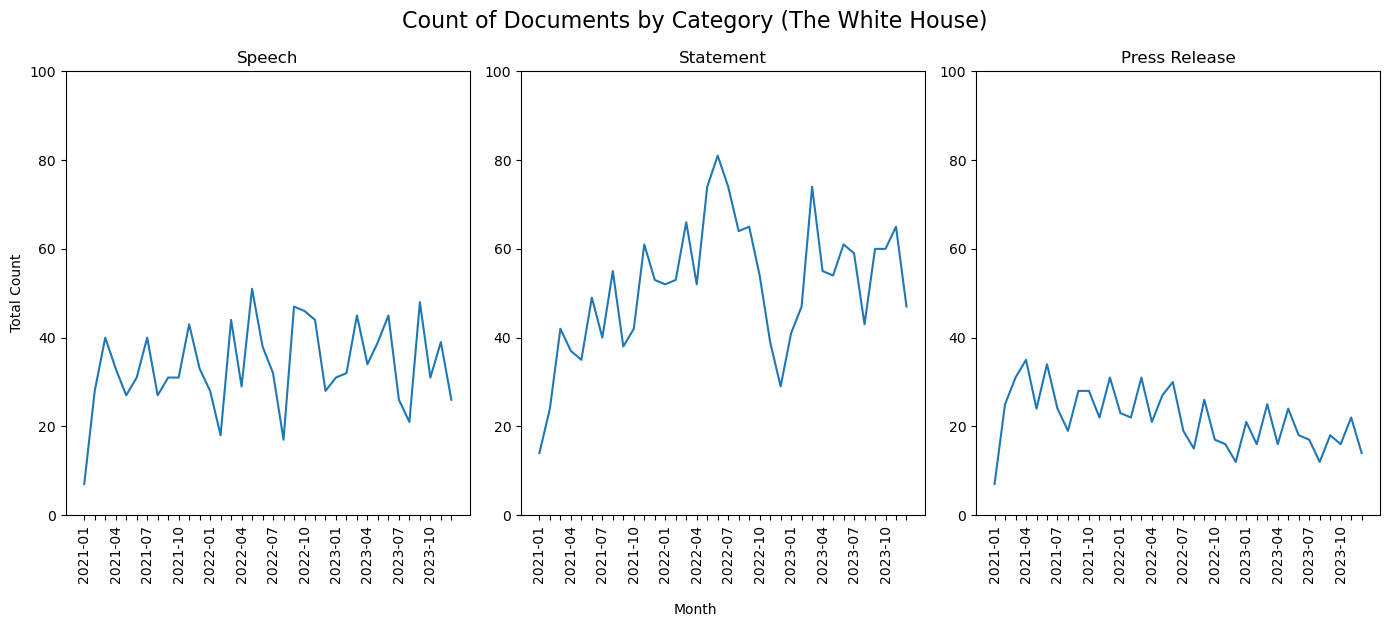

In [11]:
# Print average values
print(f"Mean number of speeches by month: {round(counts_by_month_wh_speech['Total Count'].mean())}")
print(f"Mean number of statements by month: {round(counts_by_month_wh_statement['Total Count'].mean())}")
print(f"Mean number of press releases by month: {round(counts_by_month_wh_pr['Total Count'].mean())}")

# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(counts_by_month_wh_speech['Date'], counts_by_month_wh_speech['Total Count'])
axs[0].set_title('Speech')
axs[0].set_ylabel('Total Count')
axs[0].set_ylim(0, 100)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(counts_by_month_wh_statement['Date'], counts_by_month_wh_statement['Total Count'])
axs[1].set_title('Statement')
axs[1].set_ylim(0, 100)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(counts_by_month_wh_pr['Date'], counts_by_month_wh_pr['Total Count'])
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 100)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')            
            
# Add a common title
plt.suptitle('Count of Documents by Category (The White House)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Share of Documents Mentioning Ukraine by Month

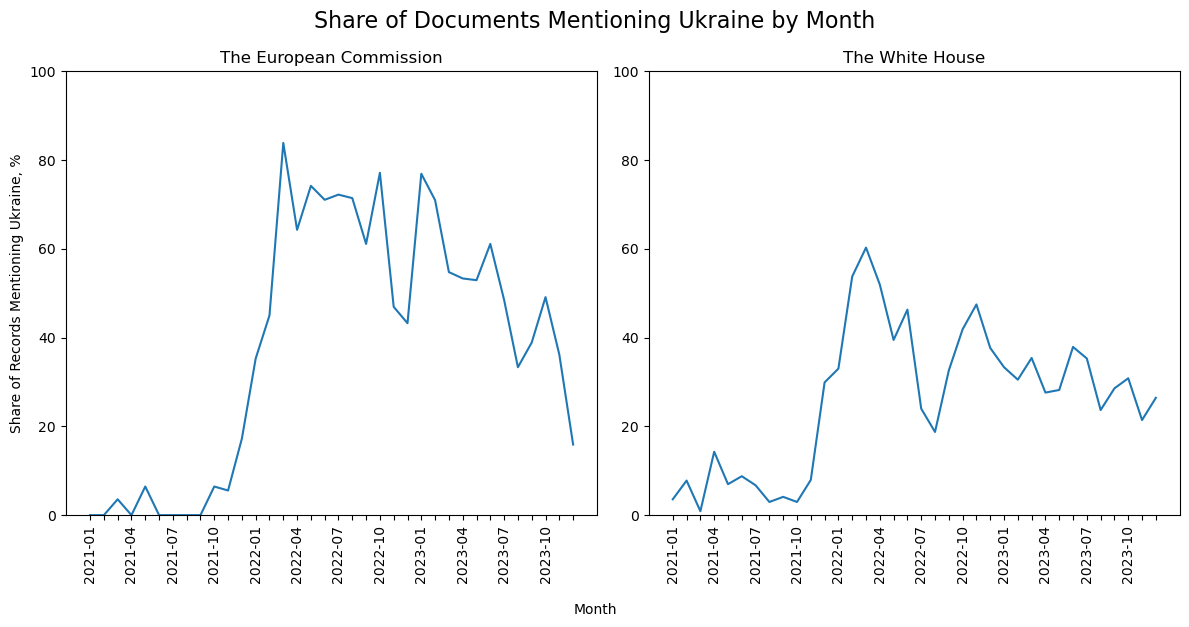

In [12]:
## Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for The European Commission
axs[0].plot(count_by_month_ec['Date'], count_by_month_ec['Mentions Share']*100)
axs[0].set_title('The European Commission')
axs[0].set_ylabel('Share of Records Mentioning Ukraine, %')
axs[0].set_ylim(0, 100)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot for The White House
axs[1].plot(count_by_month_wh['Date'], count_by_month_wh['Mentions Share']*100)
axs[1].set_title('The White House')
axs[1].set_ylim(0, 100)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')

# Add a common title
plt.suptitle('Share of Documents Mentioning Ukraine by Month', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Share of Documents Mentioning Ukraine by Month and Category

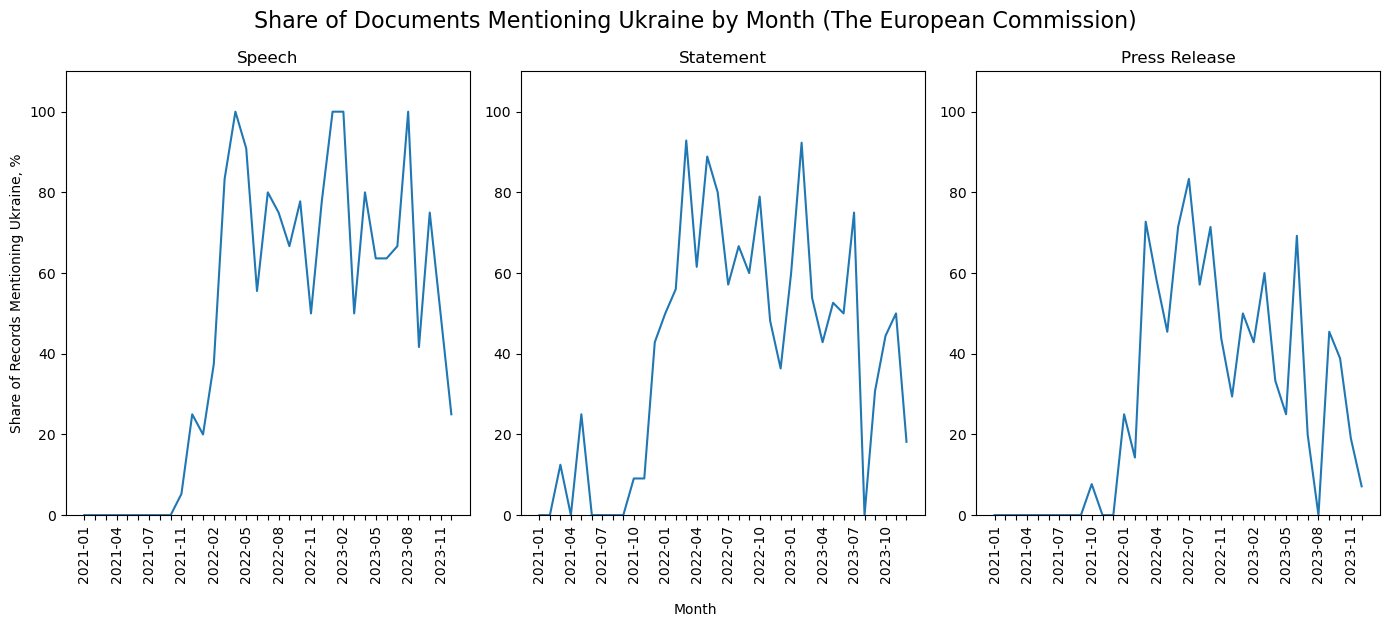

In [13]:
## The European Commission

# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(counts_by_month_ec_speech['Date'], counts_by_month_ec_speech['Mentions Share']*100)
axs[0].set_title('Speech')
axs[0].set_ylabel('Share of Records Mentioning Ukraine, %')
axs[0].set_ylim(0, 110)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(counts_by_month_ec_statement['Date'], counts_by_month_ec_statement['Mentions Share']*100)
axs[1].set_title('Statement')
axs[1].set_ylim(0, 110)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(counts_by_month_ec_pr['Date'], counts_by_month_ec_pr['Mentions Share']*100)
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 110)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')            
            
# Add a common title
plt.suptitle('Share of Documents Mentioning Ukraine by Month (The European Commission)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

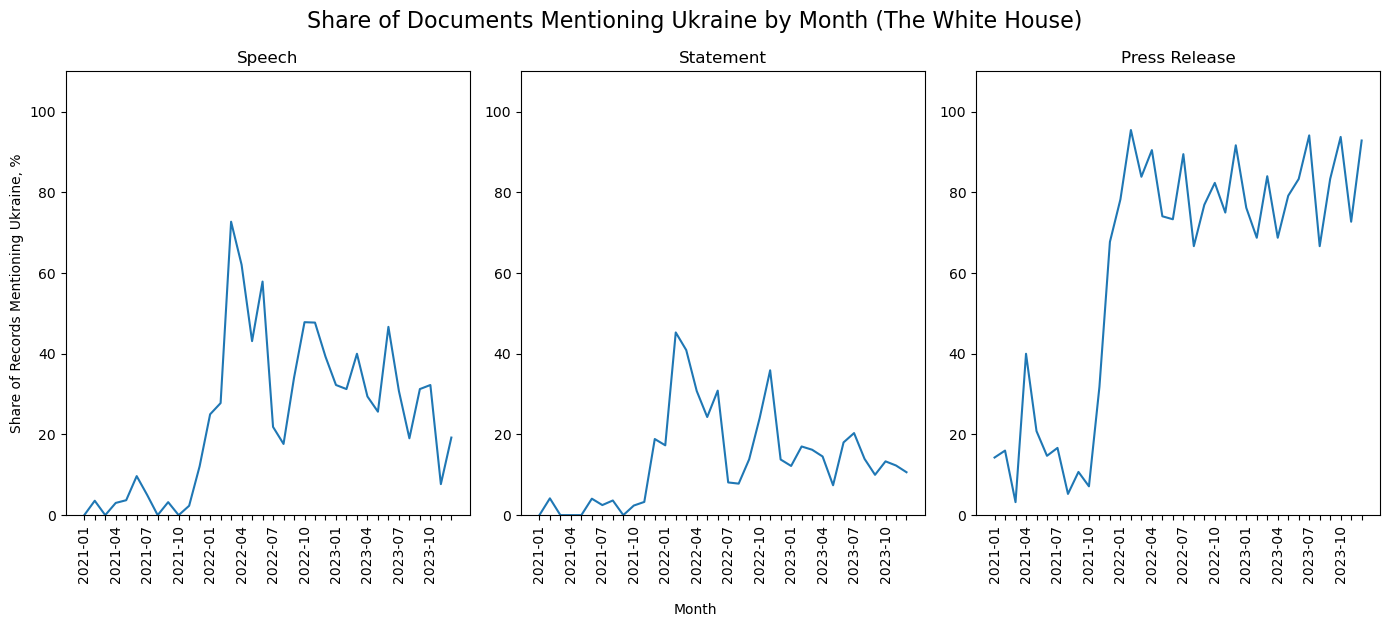

In [14]:
## The White House

# Create a figure and three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1
axs[0].plot(counts_by_month_wh_speech['Date'], counts_by_month_wh_speech['Mentions Share']*100)
axs[0].set_title('Speech')
axs[0].set_ylabel('Share of Records Mentioning Ukraine, %')
axs[0].set_ylim(0, 110)
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2
axs[1].plot(counts_by_month_wh_statement['Date'], counts_by_month_wh_statement['Mentions Share']*100)
axs[1].set_title('Statement')
axs[1].set_ylim(0, 110)
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 3
axs[2].plot(counts_by_month_wh_pr['Date'], counts_by_month_wh_pr['Mentions Share']*100)
axs[2].set_title('Press Release')
axs[2].set_ylim(0, 110)
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Show every 3rd label on x-axis for each subplot
for ax in axs:
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 3 != 0:
            label.set_visible(False)

# Add a common y-axis label
fig.text(0.5, -0.02, 'Month', ha='center', va='center')            
            
# Add a common title
plt.suptitle('Share of Documents Mentioning Ukraine by Month (The White House)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Save Data for the Granger Causality Test

In [15]:
# Prepare data for the Granger Causality test (weekly level)

count_by_week_ec = group_data(ec_data, period='W')
count_by_week_wh = group_data(wh_data, period='W')

combined_data_counts_weekly = pd.merge(count_by_week_ec[['Date', 'Mentions Count']], 
                                      count_by_week_wh[['Date', 'Mentions Count']], 
                                      on='Date').set_index('Date')
combined_data_counts_weekly.columns = ['European Commission', 'White House']

In [16]:
# Save data for the test

combined_data_counts_weekly.to_csv('granger_causality_test_data/combined_data_counts_weekly.csv')